Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Processing

In [4]:
# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv('train_u6lujuX_CVtuZ9i (1).csv')

In [5]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [6]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
# number of rows and columns
loan_dataset.shape

(614, 13)

In [9]:
# statistical measures
loan_dataset.describe

<bound method NDFrame.describe of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
5    LP001011    Male     Yes          2      Graduate           Yes   
6    LP001013    Male     Yes          0  Not Graduate            No   
7    LP001014    Male     Yes         3+      Graduate            No   
8    LP001018    Male     Yes          2      Graduate            No   
9    LP001020    Male     Yes          1      Graduate            No   
10   LP001024    Male     Yes          2      Graduate            No   
11   LP001027    Male     Yes          2      Graduate           NaN   
12   LP001028    Male     Yes 

In [10]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
# dropping the missing values
loan_dataset = loan_dataset.dropna()

In [12]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
# label encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

C:\Users\Pahul\anaconda3\envs\UL\lib\site-packages\pandas\core\generic.py:6517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


In [14]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [15]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [16]:
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [17]:
# dependent values
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

Data Visualization

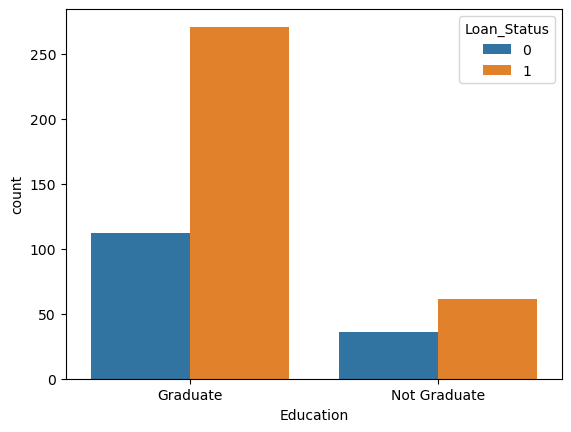

In [18]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

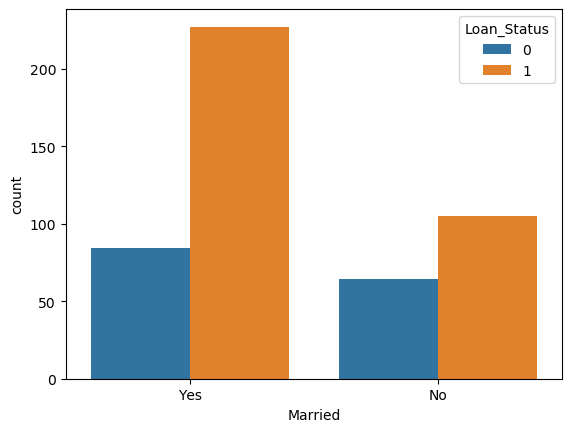

In [19]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

In [20]:
# convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [21]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [22]:
# separating the data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [23]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
6         1        1          0          0              0             2333   
7         1        1          4          1              0             3036   
8         1        1          2          1              0             4006   
9         1        1          1          1              0            12841   
10        1        1          2          1              0             3200   
12        1        1          2          1              0             3073   
13        1        0          0          1              0       

Train Test Split

In [24]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


Training the model:

Support Vector Machine Model

In [26]:
classifier = svm.SVC(kernel='linear')

In [27]:
#training the support Vector Macine model
classifier.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Model Evaluation

In [28]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [29]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.7986111111111112


In [30]:
# accuracy score on training data
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [31]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8333333333333334


Making a predictive system